In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Prompt1AccountLevel.csv")
df.columns = df.columns.str.strip()  # Clean column names

# Clean the AvgSpend column by removing "$" and converting to numeric
df['AvgSpend'] = pd.to_numeric(df['AvgSpend'].replace('[\$,]', '', regex=True), errors='coerce')

# Convert other numeric columns as needed
numeric_cols = ["SingleGameTickets", "PartialPlanTickets", "GroupTickets", "STM", 
                "GamesAttended", "DistanceToArena", "BasketballPropensity"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values (or handle them as you prefer)
df.dropna(inplace=True)

df.head()


,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low
1,2023,2,2,0,0,0,116.0,1,A,47.0,485.0,Low
2,2023,3,3,0,0,0,107.0,1,B,6.0,896.0,Low
3,2023,4,0,0,3,0,27.0,1,C,3.0,467.0,High
4,2023,5,0,0,2,0,14.0,1,A,4.0,582.0,Medium


In [7]:
# Create dummy variables for categorical columns
dummies = pd.get_dummies(df[['FanSegment', 'SocialMediaEngagement']], drop_first=True)

# Combine numeric predictors with dummy variables.
# You can choose a set of predictors; here we use several ticket-related variables and fan behavior measures.
df_features = pd.concat([
    df[['STM', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'GamesAttended', 'DistanceToArena', 'BasketballPropensity']],
    dummies
], axis=1)

# Inspect the features
df_features.head()


,STM,SingleGameTickets,PartialPlanTickets,GroupTickets,GamesAttended,DistanceToArena,BasketballPropensity,FanSegment_B,FanSegment_C,FanSegment_D,FanSegment_E,FanSegment_F,FanSegment_G,FanSegment_Limited Data,SocialMediaEngagement_Low,SocialMediaEngagement_Medium
0,0,0,0,0,0,12.0,872.0,False,False,False,False,True,False,False,True,False
1,0,2,0,0,1,47.0,485.0,False,False,False,False,False,False,False,True,False
2,0,3,0,0,1,6.0,896.0,True,False,False,False,False,False,False,True,False
3,0,0,0,3,1,3.0,467.0,False,True,False,False,False,False,False,False,False
4,0,0,0,2,1,4.0,582.0,False,False,False,False,False,False,False,False,True


In [8]:
# Set up predictors and target variable (predicting AvgSpend)
X = df_features.copy()
y = df['AvgSpend']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared:", r2_score(y_test, y_pred_rf))


Random Forest Regression Results:
RMSE: 95.29728536031753
R-squared: 0.0704252247247944


In [9]:
# Create dummy variables for the categorical columns
dummies = pd.get_dummies(df[['FanSegment', 'SocialMediaEngagement']], drop_first=True)

# Combine a set of numeric predictors with the dummy variables.
df_features = pd.concat([
    df[['STM', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'GamesAttended', 'DistanceToArena', 'BasketballPropensity']],
    dummies
], axis=1)

# Force conversion of all features to numeric (just in case)
df_features = df_features.apply(pd.to_numeric, errors='coerce')

df_features.head()


,STM,SingleGameTickets,PartialPlanTickets,GroupTickets,GamesAttended,DistanceToArena,BasketballPropensity,FanSegment_B,FanSegment_C,FanSegment_D,FanSegment_E,FanSegment_F,FanSegment_G,FanSegment_Limited Data,SocialMediaEngagement_Low,SocialMediaEngagement_Medium
0,0,0,0,0,0,12.0,872.0,False,False,False,False,True,False,False,True,False
1,0,2,0,0,1,47.0,485.0,False,False,False,False,False,False,False,True,False
2,0,3,0,0,1,6.0,896.0,True,False,False,False,False,False,False,True,False
3,0,0,0,3,1,3.0,467.0,False,True,False,False,False,False,False,False,False
4,0,0,0,2,1,4.0,582.0,False,False,False,False,False,False,False,False,True


In [10]:
# Predicting AvgSpend
X_rf = df_features.copy()
y_rf = df['AvgSpend']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared:", r2_score(y_test, y_pred_rf))


Random Forest Regression Results:
RMSE: 95.29728536031753
R-squared: 0.0704252247247944


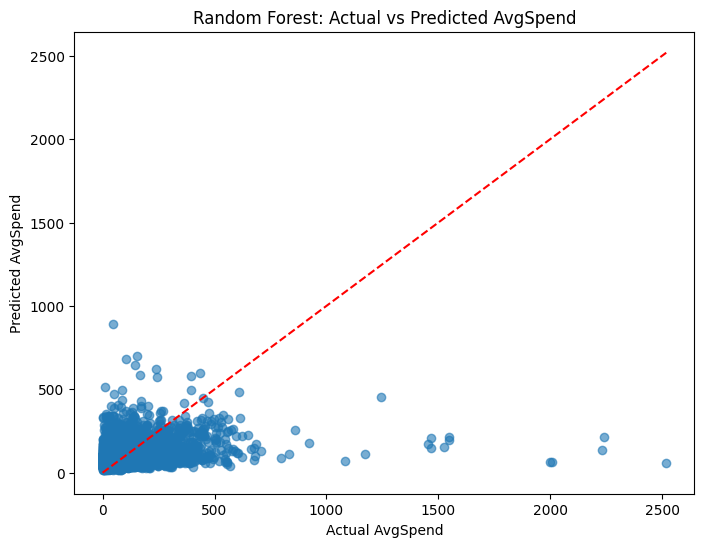

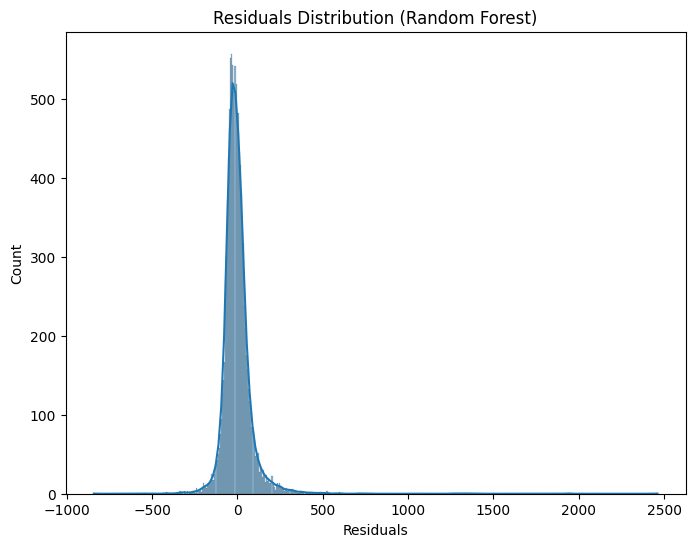

In [11]:
# Scatter plot: Actual vs. Predicted AvgSpend
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual AvgSpend")
plt.ylabel("Predicted AvgSpend")
plt.title("Random Forest: Actual vs Predicted AvgSpend")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residuals plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Random Forest)")
plt.show()


Poisson Regression Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:      SingleGameTickets   No. Observations:                36796
Model:                            GLM   Df Residuals:                    36779
Model Family:                 Poisson   Df Model:                           16
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94496.
Date:                Sat, 08 Feb 2025   Deviance:                   1.2004e+05
Time:                        20:19:28   Pearson chi2:                 3.08e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             -1.577
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

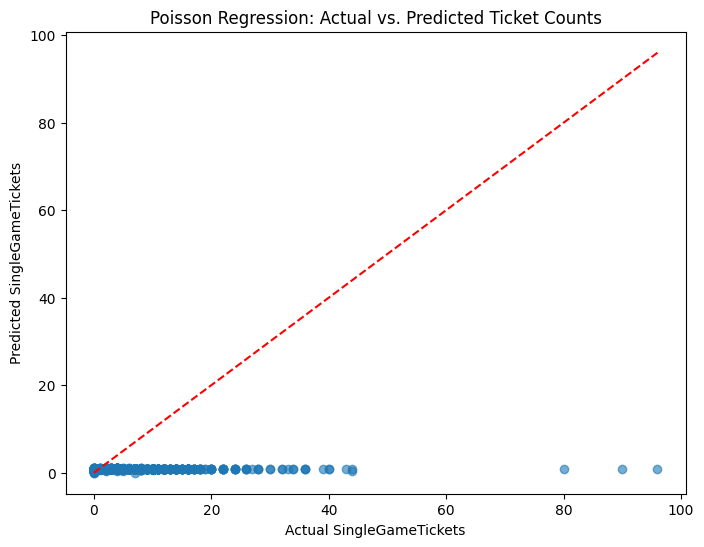

In [16]:
X_poisson = sm.add_constant(df_features)

# Force all columns to numeric (float)
X_poisson = X_poisson.astype(float)

# Convert the dependent variable to float as well
y_poisson = df['SingleGameTickets'].astype(float)

# (Optional) Drop any rows with missing values in either X or y
mask = X_poisson.notnull().all(axis=1) & y_poisson.notnull()
X_poisson_clean = X_poisson[mask]
y_poisson_clean = y_poisson[mask]

# Fit a Poisson regression using GLM
model_poisson = sm.GLM(y_poisson_clean, X_poisson_clean, family=sm.families.Poisson()).fit()
print("Poisson Regression Results:")
print(model_poisson.summary())

# --- Visualization for Poisson Regression ---
# Predict counts using the Poisson model
predicted_counts = model_poisson.predict(X_poisson_clean)

# Scatter plot: Actual vs. Predicted SingleGameTickets
plt.figure(figsize=(8,6))
plt.scatter(y_poisson_clean, predicted_counts, alpha=0.6)
plt.xlabel("Actual SingleGameTickets")
plt.ylabel("Predicted SingleGameTickets")
plt.title("Poisson Regression: Actual vs. Predicted Ticket Counts")
plt.plot([y_poisson_clean.min(), y_poisson_clean.max()],
         [y_poisson_clean.min(), y_poisson_clean.max()], 'r--')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11
Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:        TicketPurchased   No. Observations:                36796
Model:                          Logit   Df Residuals:                    36780
Method:                           MLE   Df Model:                           15
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                    -inf
Time:                        20:22:19   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -23478.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.9384      0.

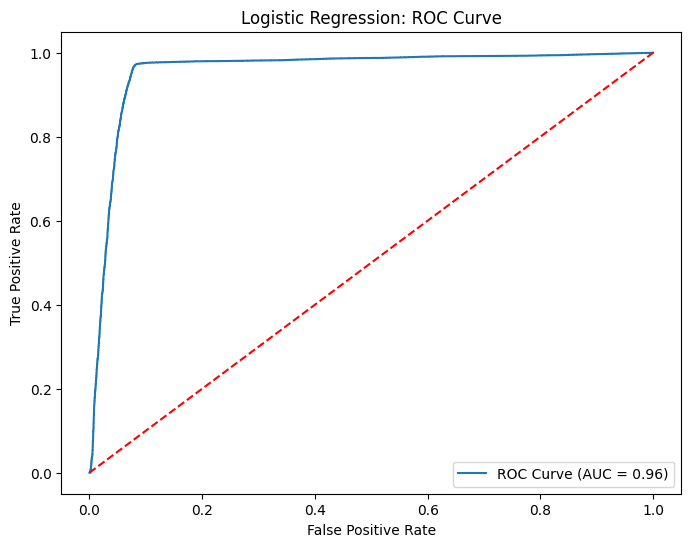

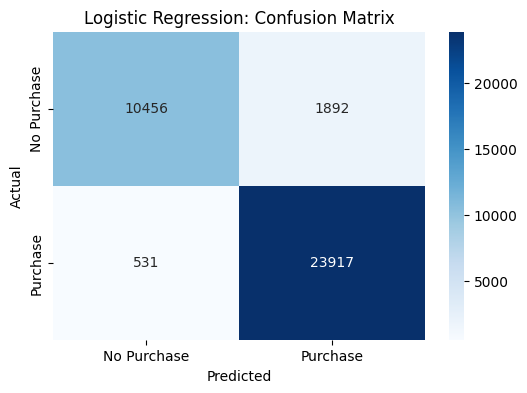

In [19]:


# --- Logistic Regression ---

# Create a binary outcome variable:
# 1 if at least one SingleGameTicket was purchased; 0 otherwise.
df['TicketPurchased'] = (df['SingleGameTickets'] > 0).astype(int)

# For logistic regression, drop the predictor 'SingleGameTickets'
df_features_logistic = df_features.drop(columns=['SingleGameTickets'])

# Build the feature matrix for logistic regression: add a constant
X_logistic = sm.add_constant(df_features_logistic)
X_logistic = X_logistic.astype(float)  # Force predictors to float

# Convert the dependent variable to float as well
y_logistic = df['TicketPurchased'].astype(float)

# Drop any rows with missing values
mask_log = X_logistic.notnull().all(axis=1) & y_logistic.notnull()
X_logistic_clean = X_logistic[mask_log]
y_logistic_clean = y_logistic[mask_log]

# Fit the logistic regression model using Logit
model_logistic = sm.Logit(y_logistic_clean, X_logistic_clean).fit()
print("Logistic Regression Results:")
print(model_logistic.summary())

# --- Visualization for Logistic Regression ---

# Predict probabilities from the logistic model
y_prob = model_logistic.predict(X_logistic_clean)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_logistic_clean, y_prob)
auc = roc_auc_score(y_logistic_clean, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression: ROC Curve")
plt.legend(loc="best")
plt.show()

# Confusion matrix with a threshold of 0.5
y_pred_logistic = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_logistic_clean, y_pred_logistic)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Purchase", "Purchase"],
            yticklabels=["No Purchase", "Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()
